In [1]:
import predictionModel as pm

In [2]:
from sklearn.decomposition import PCA
import pandas as pd

In [3]:
repo, repo_dir, ss, pca, kmeans = pm.getClusterData()

wrong


In [4]:
fullPoint = pm.getTestPoint(repo_dir)

...Reading an input file from remote repo...


In [5]:
point = pm.testPointProcessing(fullPoint, ss, pca)

In [6]:
suggestionNumber, delinq, appr, depr, neighbors, std_cluster_data = pm.provideSuggestion(point, repo_dir, ss, pca, kmeans, fullPoint)

...Reading an input file from remote repo...


In [7]:
# PCA everything down to 2 dimensions
pca = PCA(n_components=2)

# Get the cluster points
pca_cluster = pca.fit_transform(std_cluster_data)

# Get the neighbor points
columnsForClustering = ['MonthlyIncome', 'UPBatAcquisition', 'LTVRatio', 'BorrowerCount', 'InterestRate', 'OriginationValue', 'HousingExpenseToIncome', 'TotalDebtToIncome', 'B1CreditScore', 'B2CreditScore']
reduced_neighbors = neighbors[columnsForClustering]
std_neighbors = pd.DataFrame(ss.transform(reduced_neighbors), columns=reduced_neighbors.columns)
pca_neighbors = pca.transform(std_neighbors)

# Get the test point
reduced_point = fullPoint[columnsForClustering]
std_point = pd.DataFrame(ss.transform(reduced_point), columns=reduced_point.columns)
pca_point = pca.transform(std_point)
pca_point

array([[-0.63034997, -1.21877331]])

In [9]:
import matplotlib.pyplot as plt

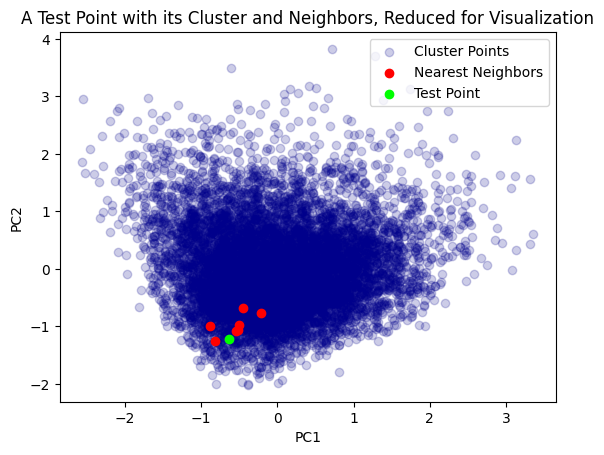

In [23]:
plt.figure("Test Point Graph")

plt.scatter(pca_cluster[:,0], pca_cluster[:,1], c='darkblue', alpha=.2, label='Cluster Points')
plt.scatter(pca_neighbors[:,0], pca_neighbors[:,1], c='red', label='Nearest Neighbors')
plt.scatter(pca_point[:,0], pca_point[:,1], c='lime', label='Test Point')

plt.title("A Test Point with its Cluster and Neighbors, Reduced for Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.legend()
plt.savefig("TestPointVisual.png")